In [60]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
import pickle
from glob import glob
from astropy.visualization import make_lupton_rgb

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import diagnostic_plot, plot, plot_util, overplot

In [61]:
input_dir = os.path.join(config.machine.pipeline_dir, '04_test')

In [62]:
limit = 9
uid_list = [str(uid).zfill(8) for uid in list(range(limit))]

In [63]:
def _rescale_rgb_float(image_b, image_g, image_r):
    max = plot_util.get_v([image_b, image_g, image_r])
    image_b /= max
    image_g /= max
    image_r /= max

    return image_b, image_g, image_r

def get_rgb(image_b, image_g, image_r, minimum=None, stretch=3, Q=4):
    # image_b, image_g, image_r = _rescale_rgb_float(image_b, image_g, image_r)

    # assert image_b.shape == image_g.shape == image_r.shape
    if minimum is None:
        min_r = np.min(image_r)
        min_g = np.min(image_g)
        min_b = np.min(image_b)
        # minimum = np.min(np.concatenate((image_b, image_g, image_r)))
        minimum = [min_r, min_g, min_b]
        print(minimum)
    return make_lupton_rgb(image_r=image_r, image_g=image_g, image_b=image_b, minimum=minimum, stretch=stretch, Q=Q)

In [64]:
color_images = []

for uid in uid_list:
    print(f'uid: {uid}')
    f106 = np.load(input_dir + f'/galsim_{uid}_F106.npy')
    f129 = np.load(input_dir + f'/galsim_{uid}_F129.npy')
    f184 = np.load(input_dir + f'/galsim_{uid}_F184.npy')

    rgb_image = get_rgb(image_b=f106, image_g=f129, image_r=f184, stretch=4, Q=5, minimum=None)
    color_images.append(rgb_image)
    print('\n')

uid: 00000000
[0.38356164, 0.6712329, 0.63013697]


uid: 00000001
[0.32876712, 0.5684931, 0.55479455]


uid: 00000002
[0.4041096, 0.7328767, 0.7123288]


uid: 00000003
[0.47260273, 0.75342464, 0.75342464]


uid: 00000004
[0.48630136, 0.8767123, 0.82191783]


uid: 00000005
[0.7808219, 1.4109589, 1.3356165]


uid: 00000006
[1.3082192, 2.2671232, 2.2876713]


uid: 00000007
[0.29452056, 0.42465752, 0.4178082]


uid: 00000008
[1.8013699, 3.2054794, 3.1232877]




In [65]:
vargs = plot_util.set_v(color_images)
print(vargs)

{'vmin': 1, 'vmax': 255}


In [66]:
dark = color_images[0]
light = color_images[6]

print(f'dark: min {np.min(dark)}, max {np.max(dark)}')
print(f'light: min {np.min(light)}, max {np.max(light)}')

dark: min 0, max 180
light: min 0, max 135


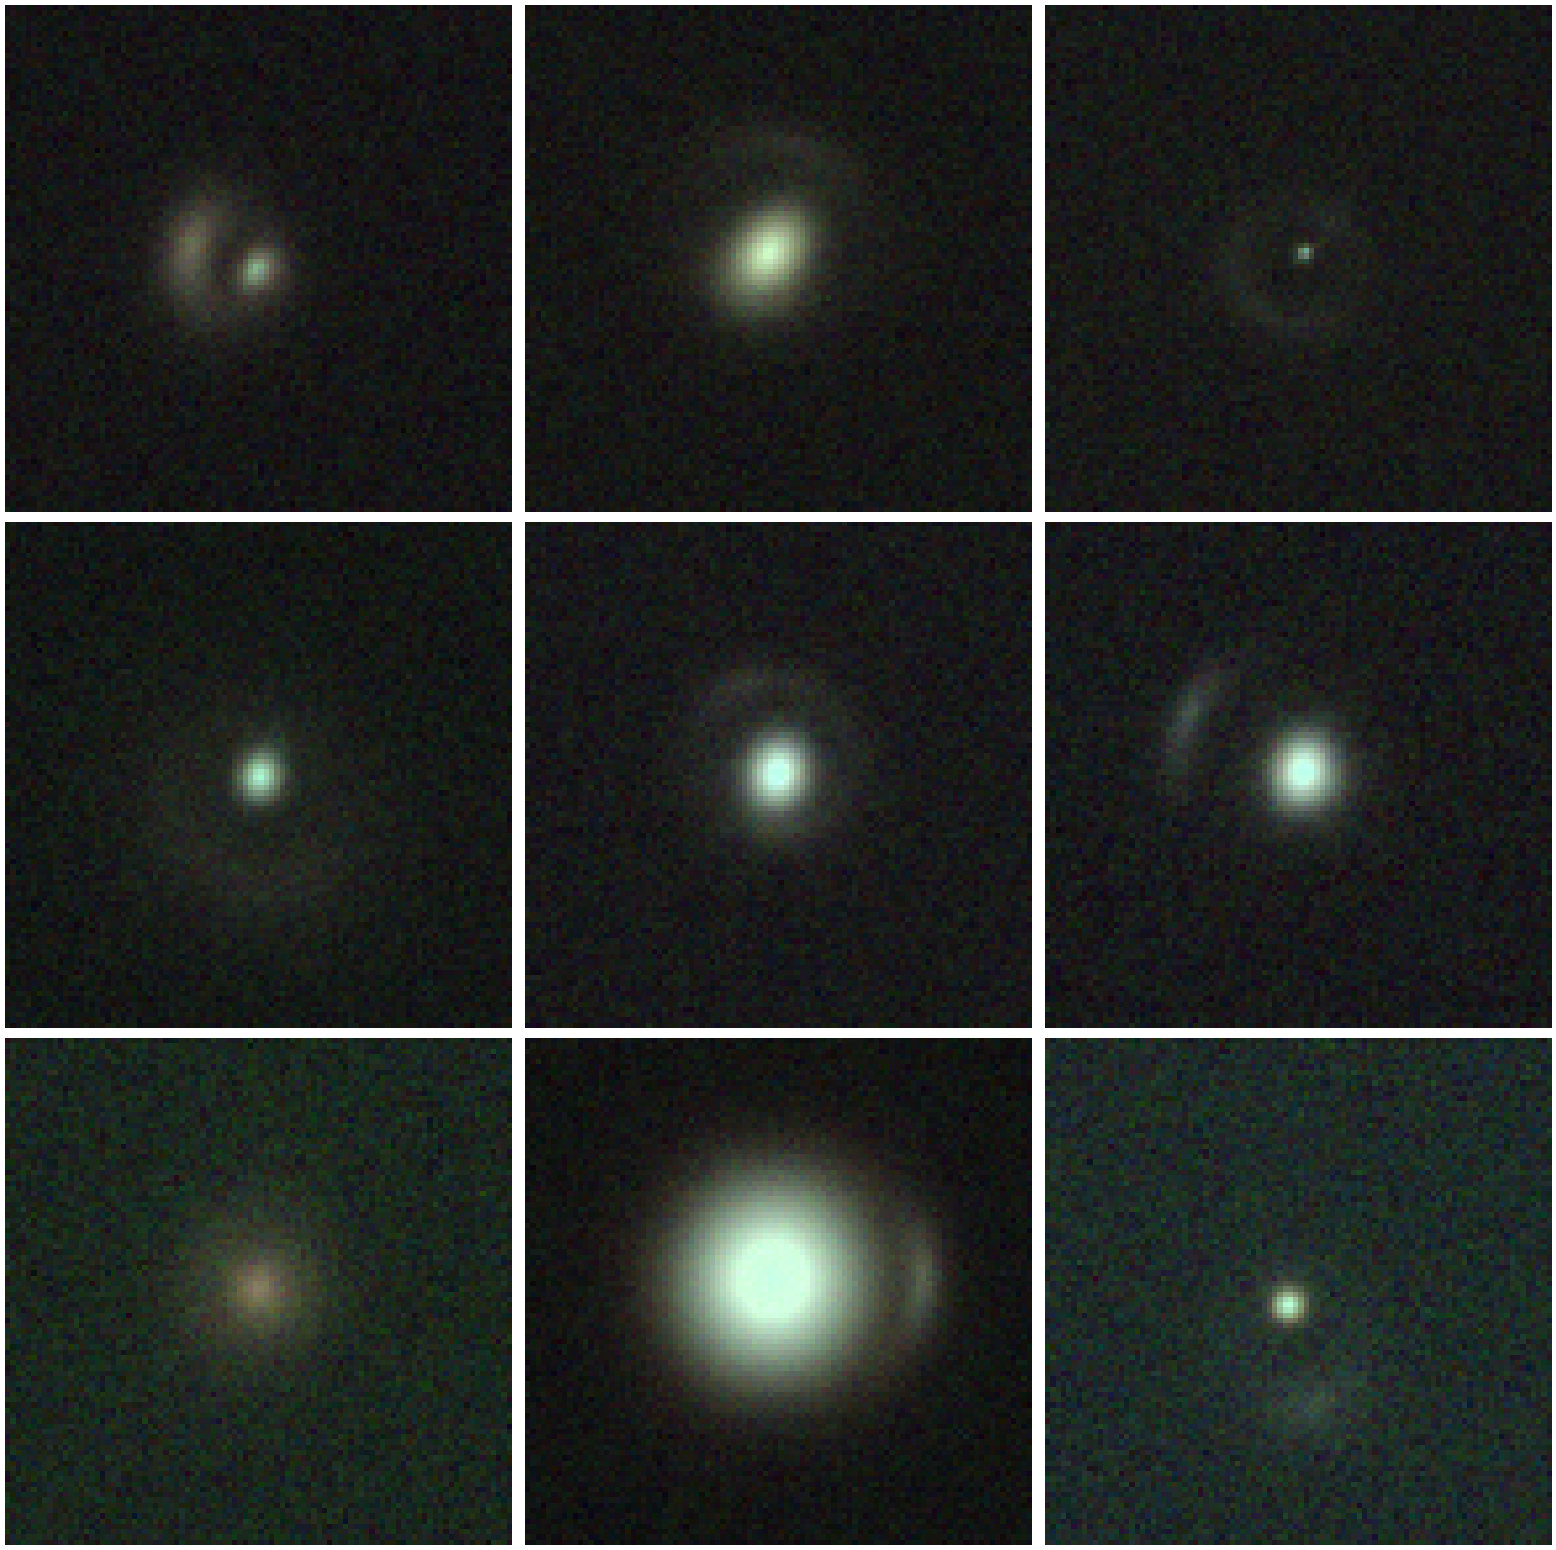

In [67]:
plot.rgb_plot_grid(color_images, 3)